# Other models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE, r2_score
from col_eda import close_d_org, close_d, close_w, close_m, eda_df, model_training, cross_val, test_result
from col_eda import generate_X_y, spliting_data, fit_predict, evaluate, plot_actual_vs_predicted

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from scipy.stats import randint, uniform

import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [12, 8]

## LinearRegression

In [31]:
model, X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val, error_train, score_train, error_val, score_val = model_training(close_d_org['Close'], 40, 1, 0.7, 0.85, LinearRegression(), 0, 0)

Training - RMSE: 0.22460385269318986, R2: 0.986570818753383
Validation - RMSE: 0.18961565966560923, R2: 0.9460438467597156
Change last parameter to none-zero to plot: Actual vs predicted


In [32]:
param_grid = {
    'alpha': np.logspace(-4, 4, 100)  
}

best_model = cross_val(Ridge(), param_grid, X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'alpha': 1.9179102616724888}
Best rmse: 0.25952772106170036


In [33]:
model_lr, X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val, rmse_lr_train, r2_lr_train, rmse_lr_val, r2_lr_val = model_training(close_d_org['Close'], 40, 1, 0.7, 0.85, best_model, 0, 0)

Training - RMSE: 0.2247938811572509, R2: 0.9865480853389954
Validation - RMSE: 0.1895644816428108, R2: 0.9460729687910208
Change last parameter to none-zero to plot: Actual vs predicted


In [34]:
rmse_lr_test, r2_lr_test = test_result(model_lr, X_test_scaled, y_test)

RMSE: 0.15770887317491783
R2 0.9836997231387395


## Decision Tree

In [11]:
model, X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val, error_train, score_train, error_val, score_val = model_training(close_d_org['Close'], 40, 1, 0.7, 0.85, DecisionTreeRegressor(), 0, 0)

Training - RMSE: 0.0, R2: 1.0
Validation - RMSE: 0.32388916079683083, R2: 0.8425707576421255
Change last parameter to none-zero to plot: Actual vs predicted


In [12]:
param_grid = param_grid = {
    'max_depth': [3, 4, 5, 6, 7],  # Example: Limit the depth of the tree
    'min_samples_split': [1, 2, 3, 4, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9]  # The minimum number of samples required to be at a leaf node
}


best_model = cross_val(DecisionTreeRegressor(), param_grid, X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 7, 'max_depth': 4}
Best rmse: 0.8071161616680882


In [13]:
model_dt, X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val, rmse_dt_train, r2_dt_train, rmse_dt_val, r2_dt_val = model_training(close_d_org['Close'], 40, 1, 0.7, 0.85, best_model, 0, 0)

Training - RMSE: 0.2447062832549674, R2: 0.9840593739547966
Validation - RMSE: 0.23872852805668368, R2: 0.9144733980486413
Change last parameter to none-zero to plot: Actual vs predicted


In [14]:
rmse_dt_test, r2_dt_test = test_result(model_dt, X_test_scaled, y_test)

RMSE: 0.2366403704593699
R2 0.9633004789403835


## SVM 

In [11]:
#model, X_train, y_train = model_training(close_d_org['Close'], 40, 1, 0.7, 0.85, SVR(), StandardScaler(), 0)

from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'linear']
}
tscv = TimeSeriesSplit(n_splits=5)

best_model = cross_val(SVR(), param_grid, tscv, X_train, y_train)

#random_search = RandomizedSearchCV(estimator=SVR(), param_distributions=param_grid, n_iter=10, cv=tscv, scoring='neg_mean_squared_error')
#random_search.fit(X_train_scaled, y_train)
#print("Best parameters:", random_search.best_params_)
#print("Best rmse:", np.sqrt(-random_search.best_score_))  # Assuming we're interested in RMSE

In [12]:
#model_svm, predict_train, predict_val = fit_predict(SVR(kernel='linear', gamma=0.001, C=1), X_train_scaled, X_val_scaled, y_train)
#error_train, score_train = evaluate(y_train, predict_train)
#error_val, score_val = evaluate(y_val, predict_val)
#print(f"Training - RMSE: {error_train}, R2: {score_train}")
#print(f"Validation - RMSE: {error_val}, R2: {score_val}")


In [13]:
#(y_train, predict_train, title='Training: Actual vs. Predicted')
#plot_actual_vs_predicted(y_val, predict_val, title='Validation: Actual vs. Predicted')

## Random Forest

In [16]:
model, X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val, error_train, score_train, error_val, score_val = model_training(close_d_org['Close'], 40, 1, 0.7, 0.85, RandomForestRegressor(), 0, 0)

Training - RMSE: 0.08774016289056578, R2: 0.997950669494351
Validation - RMSE: 0.21801316726169725, R2: 0.9286723319721061
Change last parameter to none-zero to plot: Actual vs predicted


In [17]:
param_grid = {
    'n_estimators': sp_randint(1, 500),  # Fewer trees for quicker iterations
    'max_depth': sp_randint(1, 100),  # Simplified range
    'min_samples_split': sp_randint(1, 20),
    'min_samples_leaf': sp_randint(1, 11),
    'bootstrap': [True, False]
}
best_model = cross_val(RandomForestRegressor(), param_grid, X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'bootstrap': False, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 54}
Best rmse: 0.8031824510477377


In [18]:
model_rf, X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val, rmse_rf_train, r2_rf_train, rmse_rf_val, r2_rf_val= model_training(close_d_org['Close'], 40, 1, 0.7, 0.85, best_model, 0, 0)

Training - RMSE: 0.2445892187400088, R2: 0.984074621910639
Validation - RMSE: 0.23872852805668465, R2: 0.9144733980486406
Change last parameter to none-zero to plot: Actual vs predicted


In [19]:
rmse_rf_test, r2_rf_test = test_result(model_dt, X_test_scaled, y_test)

RMSE: 0.2366403704593699
R2 0.9633004789403835


## XGBoosting

In [20]:
model, X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val, error_train, score_train, error_val, score_val = model_training(close_d_org['Close'], 40, 1, 0.7, 0.85, xgb.XGBRegressor(), 0, 0)

Training - RMSE: 0.0060167967820500805, R2: 0.9999903629121274
Validation - RMSE: 0.2761091777460766, R2: 0.8855925615074223
Change last parameter to none-zero to plot: Actual vs predicted


In [21]:
param_grid = {
    'n_estimators': randint(100, 1000),  # Number of trees in the forest
    'learning_rate': uniform(0.01, 0.3),  # So-called `eta` value
    'max_depth': randint(3, 10),  # Maximum depth of a tree
    'min_child_weight': randint(1, 10),  # Minimum sum of instance weight(hessian) needed in a child
    'gamma': uniform(0, 0.5),  # Minimum loss reduction required to make a further partition
    'subsample': uniform(0.6, 0.4),  # Subsample ratio of the training instances
    'colsample_bytree': uniform(0.6, 0.4),  # Subsample ratio of columns when constructing each tree
    'alpha': uniform(0, 10),  # L1 regularization term on weights
    'reg_lambda': uniform(1, 10),  # L2 regularization term on weights
    # Add more parameters here if you like
}

best_model = cross_val(xgb.XGBRegressor(), param_grid, X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'alpha': 0.05061583846218687, 'colsample_bytree': 0.6643232205669994, 'gamma': 0.27436689468329306, 'learning_rate': 0.21756855930780797, 'max_depth': 7, 'min_child_weight': 9, 'n_estimators': 260, 'reg_lambda': 1.1807536361552087, 'subsample': 0.7975574860733738}
Best rmse: 0.909070004248401


In [23]:
model_xgb, X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val, rmse_xgb_train, r2_xgb_train, rmse_xgb_val, r2_xgb_val = model_training(close_d_org['Close'], 40, 1, 0.7, 0.85, best_model, 0, 0)

Training - RMSE: 0.17438276874332162, R2: 0.9919048990336573
Validation - RMSE: 0.23005254756427035, R2: 0.9205769298947097
Change last parameter to none-zero to plot: Actual vs predicted


In [25]:
rmse_xgb_test, r2_xgb_test = test_result(model_xgb, X_test_scaled, y_test)

RMSE: 0.1956790562209228
R2 0.9749059121738527


## Test fitting and plot

In [57]:
model_metrics = {
    'Model lr': {'Train RMSE': rmse_lr_train, 'Val RMSE': rmse_lr_val, 'Test RMSE': rmse_lr_test,
                'Train R2': r2_lr_train, 'Val R2': r2_lr_val, 'Test R2': r2_lr_test},
    'Model dt': {'Train RMSE': rmse_dt_train, 'Val RMSE': rmse_dt_val, 'Test RMSE': rmse_dt_test,
                'Train R2': r2_dt_train, 'Val R2': r2_dt_val, 'Test R2': r2_dt_test},
    'Model rf': {'Train RMSE': rmse_rf_train, 'Val RMSE': rmse_rf_val, 'Test RMSE': rmse_rf_test,
                'Train R2': r2_rf_train, 'Val R2': r2_rf_val, 'Test R2': r2_rf_test},
    'Model xgb': {'Train RMSE': rmse_xgb_train, 'Val RMSE': rmse_xgb_val, 'Test RMSE': rmse_xgb_test,
                'Train R2': r2_xgb_train, 'Val R2': r2_xgb_val, 'Test R2': r2_xgb_test},
}

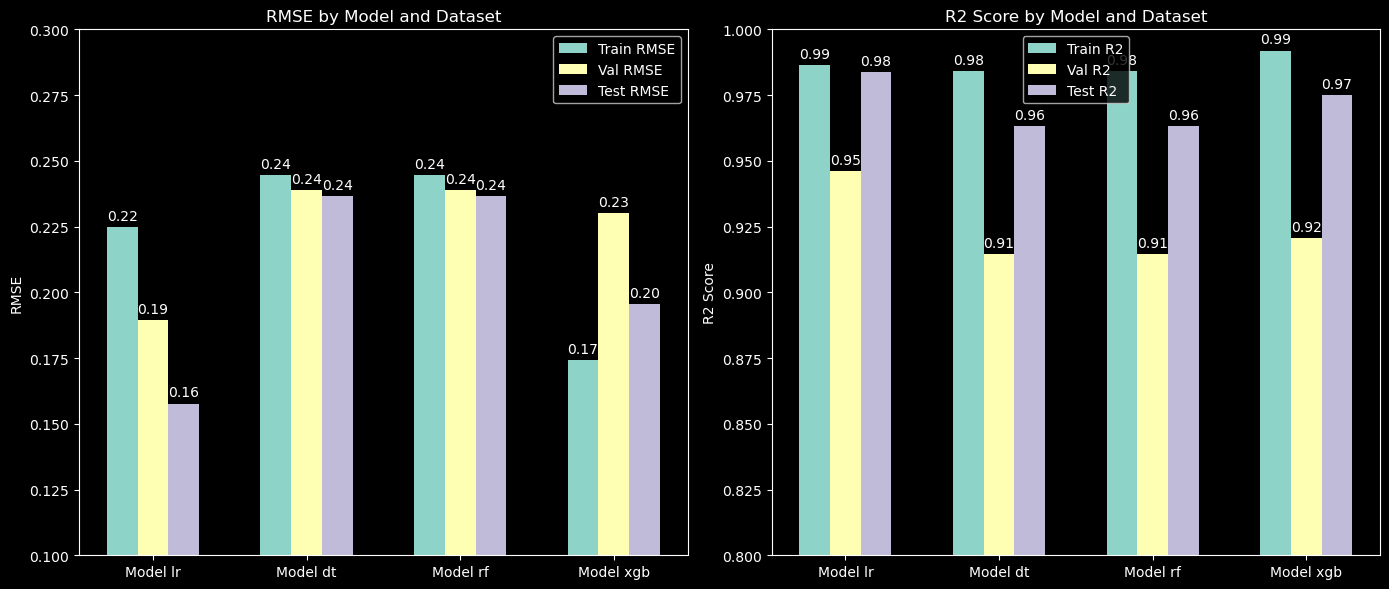

In [58]:
# Plotting function for RMSE and R2 scores
def plot_metrics(metrics):
    # Set up the matplotlib figure
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

    # Plot RMSE
    axes[0].bar(np.arange(len(metrics)) - 0.2, [m['Train RMSE'] for m in metrics.values()], 0.2, label='Train RMSE')
    axes[0].bar(np.arange(len(metrics)), [m['Val RMSE'] for m in metrics.values()], 0.2, label='Val RMSE')
    axes[0].bar(np.arange(len(metrics)) + 0.2, [m['Test RMSE'] for m in metrics.values()], 0.2, label='Test RMSE')

    # Plot R2
    axes[1].bar(np.arange(len(metrics)) - 0.2, [m['Train R2'] for m in metrics.values()], 0.2, label='Train R2')
    axes[1].bar(np.arange(len(metrics)), [m['Val R2'] for m in metrics.values()], 0.2, label='Val R2')
    axes[1].bar(np.arange(len(metrics)) + 0.2, [m['Test R2'] for m in metrics.values()], 0.2, label='Test R2')

    # Add some text for labels and title, and custom x-axis tick labels
    axes[0].set_ylabel('RMSE')
    axes[0].set_title('RMSE by Model and Dataset')
    axes[0].set_xticks(np.arange(len(metrics)))
    axes[0].set_xticklabels(metrics.keys())
    axes[0].legend()
    axes[0].set_ylim([0.1, 0.3])
    
    axes[1].set_ylabel('R2 Score')
    axes[1].set_title('R2 Score by Model and Dataset')
    axes[1].set_xticks(np.arange(len(metrics)))
    axes[1].set_xticklabels(metrics.keys())
    axes[1].legend()
    axes[1].set_ylim([0.8, 1])
    
    # Adding values on top of the bars
    for ax in axes:
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(p.get_x() + p.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    fig.tight_layout()

    plt.show()

plot_metrics(model_metrics)


## Choosing the Model:
